## 🔥 Fire Classification using Convolutional Neural Networks (CNN)

### Problem Statement
Fires can quickly cause serious harm to people, property, and nature. Detecting them early helps reduce damage and allows faster response.

### Project Goal
build a deep learning model that can tell if an image shows fire or not, using Convolutional Neural Networks (CNNs). This can help in making early fire detection systems for cameras and drones.

### Why CNN?
- Learn important patterns like shapes, colors, and textures on their own.
- Focus on areas in the image that help in detecting fire.
- Do everything without needing us to manually pick features.

### Dataset
- **Total images**: 999
  - **Fire**: 755 images
  - **No Fire**: 244 images


In [203]:
import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import regularizers

import seaborn as sns  
import pandas as pd   
import plotly.express as px    


- **Split**: 80% for training, 20% for validation.
- **Image Size**: Resized to 224×224 for model compatibility

In [204]:
data_dir = r"D:\CA-Makeen\week9\DL_Project\fire_dataset\train"  
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(224, 224),
    batch_size=32,
    label_mode='binary'
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(224, 224),
    batch_size=32,
    label_mode='binary'
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    r"D:\CA-Makeen\week9\DL_Project\fire_dataset\test",
    image_size=(224, 224),
    batch_size=32,
    label_mode='binary'
)

Found 865 files belonging to 2 classes.
Using 692 files for training.
Found 865 files belonging to 2 classes.
Using 173 files for validation.
Found 134 files belonging to 2 classes.


In [205]:
class_names = ['FIRE', 'NO FIRE']

normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))


In [206]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(),
    layers.Dropout(0.25),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'
                           ,kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D(),
     layers.Dropout(0.25),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'
                           ,kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D(),
     layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.001)),
     layers.Dropout(0.50),
    tf.keras.layers.Dense(1, activation='sigmoid') 
])


d:\CA-Makeen\week9\learning_regression\my_virtual_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [207]:
model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_35 (Conv2D)              │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 52, 52, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 26, 26, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 26, 26, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 64)             │       692,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 702,065 (2.68 MB)

 Trainable params: 702,065 (2.68 MB)

 Non-trainable params: 0 (0.00 B)

In [208]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [209]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=15,
    callbacks=[early_stop]
)


Epoch 1/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 12s 412ms/step - accuracy: 0.6477 - loss: 0.9030 - val_accuracy: 0.8150 - val_loss: 0.5035
Epoch 2/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 446ms/step - accuracy: 0.8060 - loss: 0.5276 - val_accuracy: 0.8092 - val_loss: 0.5563
Epoch 3/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 12s 526ms/step - accuracy: 0.8499 - loss: 0.4261 - val_accuracy: 0.8844 - val_loss: 0.4753
Epoch 4/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 12s 524ms/step - accuracy: 0.9018 - loss: 0.3473 - val_accuracy: 0.9595 - val_loss: 0.2978
Epoch 5/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 466ms/step - accuracy: 0.9112 - loss: 0.2985 - val_accuracy: 0.9480 - val_loss: 0.2374
Epoch 6/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 462ms/step - accuracy: 0.9437 - loss: 0.2447 - val_accuracy: 0.9364 - val_loss: 0.2691
Epoch 7/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 428ms/step - accuracy: 0.9411 - loss: 0.2183 - val_accuracy: 0.9595 - val_loss: 0.2332
Epoch 8/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 475ms/step - accuracy: 0.9609 - loss: 0.2021 - val_accu

In [210]:
loss, accuracy = model.evaluate(val_ds)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - accuracy: 0.9327 - loss: 0.2030
Validation Loss: 0.1736
Validation Accuracy: 0.9595


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


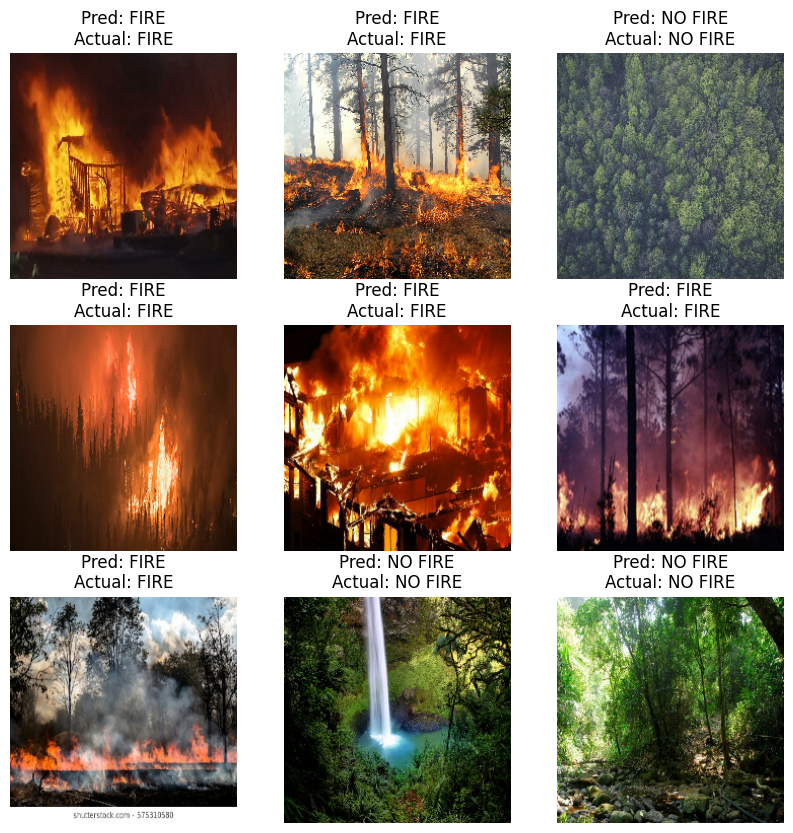

In [215]:
for images, labels in val_ds.take(1):
    predictions = model.predict(images)
    predicted_labels = (predictions > 0.5).astype("int")

    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy())
        plt.title(f"Pred: {class_names[predicted_labels[i][0]]}\nActual: {class_names[int(labels[i])]}")
        plt.axis("off")
    plt.show()


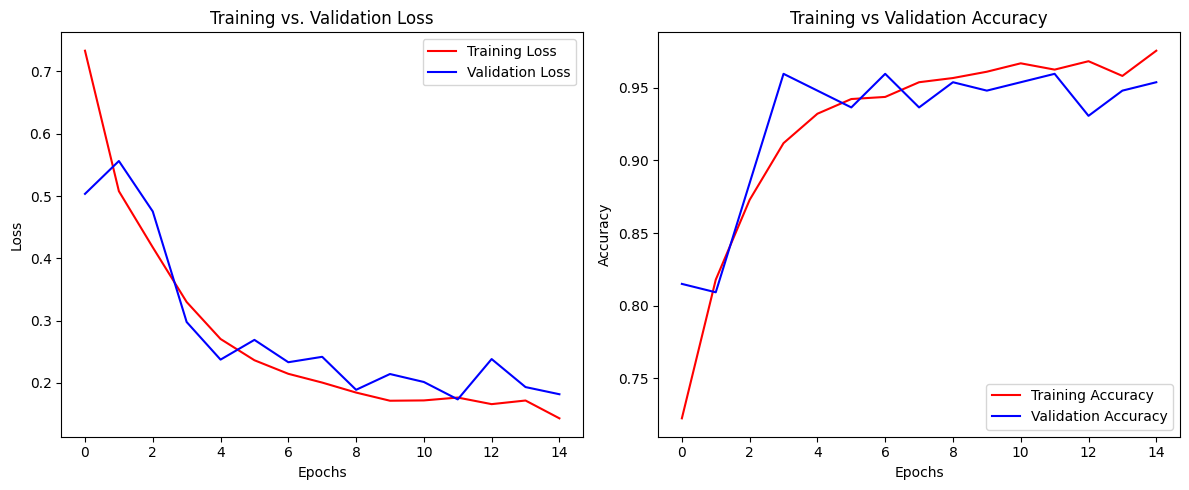

In [212]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss, 'r', label='Training Loss')
plt.plot(val_loss, 'b', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_acc, 'r', label='Training Accuracy')
plt.plot(val_acc, 'b', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


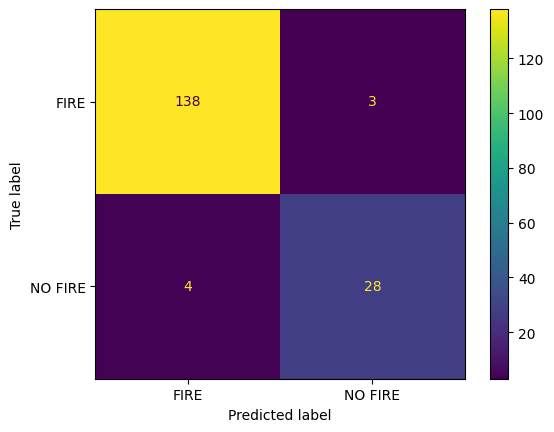

In [213]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

all_preds = []
all_labels = []
for imgs, lbls in val_ds:
    preds = model.predict(imgs)
    all_preds.extend((preds > 0.5).astype('int').flatten())
    all_labels.extend(lbls.numpy())

cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(cm, display_labels=class_names)
disp.plot()

In [214]:
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 252ms/step - accuracy: 0.9843 - loss: 0.1787
Test Loss: 0.1955
Test Accuracy: 0.9776
